# Google Causal Impact - Cambridge Analytica on Meta stocks

In [1]:
#import packages
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from causalimpact import CausalImpact
import warnings
warnings.filterwarnings('ignore')

style.use('fivethirtyeight')

In [2]:
#define dates
start = "2015-12-28"
training_end = "2018-03-05"
treatment_start = "2018-03-12"
end = "2018-07-16" #end of treatment
end_stock = "2018-07-17" 
 
#get stock data
stocks = ["MET", "WMT", "DIS", "BMW.DE", "NVS",
          "GS", "GE", "KHC", "MCD", "CARL-B.CO"]

In [3]:
df = yf.download(tickers = stocks,
                 start = start,
                 end = end_stock,
                 interval = '1wk')

[*********************100%***********************]  10 of 10 completed


In [4]:
df.head()

Adj Close                                                 \
               BMW.DE   CARL-B.CO        DIS          GE          GS   
Date                                                                   
2015-12-28  68.664032  523.957825  99.137016  167.678955  157.248505   
2016-01-04  58.684071  508.132263  93.636734  153.144974  143.035660   
2016-01-11  54.872150  454.667084  88.589310  153.360291  135.767822   
2016-01-18  56.060734  462.366089  91.419640  152.014526  136.858414   
2016-01-25  53.915646  494.445160  90.400726  156.643860  140.959152   

                                                                    ...  \
                  KHC         MCD        MET        NVS        WMT  ...   
Date                                                                ...   
2015-12-28  54.473343   98.694115  33.303364  59.577045  52.994843  ...   
2016-01-04  53.290436   96.471992  29.034233  56.474937  54.931355  ...   
2016-01-11  51.808086   96.221321  29.759567  55.554001  53.539490  ...   
2016-01-18  55.693684   98.911324  30.526363  56.945793  54.196518  ...   
2016-01-25  58.441299  103.405777  30.844122  53.989105  57.369293  ...   

              Volume                                                    \
              BMW.DE CARL-B.CO       DIS        GE        GS       KHC   
Date                                                                     
2015-12-28   1369610    241770  29287000  23546260   6860400  13409700   
2016-01-04  10993048   1100474  68050700  57864829  24424200  19504700   
2016-01-11  12546620   2284226  63547000  49375413  24590000  20863900   
2016-01-18   9592422   2009991  54586900  47287293  26552300  19034000   
2016-01-25   8558345   1989665  36581000  37476611  24623300  21373200   

                                                    
                 MCD       MET       NVS       WMT  
Date                                                
2015-12-28  12115100  18752996   6897438  25597100  
2016-01-04  36434100  63054156  13526143  86077700  
2016-01-11  38424500  67601061  13919199  66684700  
2016-01-18  39956200  41089211  10789041  51707100  
2016-01-25  48887000  37616621  18249948  60196300  

[5 rows x 60 columns]

In [5]:
#Get only data that we want
df_aux = df.iloc[:, :10]

#check
df_aux.head()

Adj Close                                                 \
               BMW.DE   CARL-B.CO        DIS          GE          GS   
Date                                                                   
2015-12-28  68.664032  523.957825  99.137016  167.678955  157.248505   
2016-01-04  58.684071  508.132263  93.636734  153.144974  143.035660   
2016-01-11  54.872150  454.667084  88.589310  153.360291  135.767822   
2016-01-18  56.060734  462.366089  91.419640  152.014526  136.858414   
2016-01-25  53.915646  494.445160  90.400726  156.643860  140.959152   

                                                                    
                  KHC         MCD        MET        NVS        WMT  
Date                                                                
2015-12-28  54.473343   98.694115  33.303364  59.577045  52.994843  
2016-01-04  53.290436   96.471992  29.034233  56.474937  54.931355  
2016-01-11  51.808086   96.221321  29.759567  55.554001  53.539490  
2016-01-18  55.693684   98.911324  30.526363  56.945793  54.196518  
2016-01-25  58.441299  103.405777  30.844122  53.989105  57.369293

In [6]:
#unstock
df_aux.columns = df_aux.columns.droplevel()
df_aux.head()

,BMW.DE,CARL-B.CO,DIS,GE,GS,KHC,MCD,MET,NVS,WMT
Date,,,,,,,,,,
2015-12-28,68.664032,523.957825,99.137016,167.678955,157.248505,54.473343,98.694115,33.303364,59.577045,52.994843
2016-01-04,58.684071,508.132263,93.636734,153.144974,143.035660,53.290436,96.471992,29.034233,56.474937,54.931355
2016-01-11,54.872150,454.667084,88.589310,153.360291,135.767822,51.808086,96.221321,29.759567,55.554001,53.539490
2016-01-18,56.060734,462.366089,91.419640,152.014526,136.858414,55.693684,98.911324,30.526363,56.945793,54.196518
2016-01-25,53.915646,494.445160,90.400726,156.643860,140.959152,58.441299,103.405777,30.844122,53.989105,57.369293


In [7]:
#null values
df_aux = df_aux.dropna()

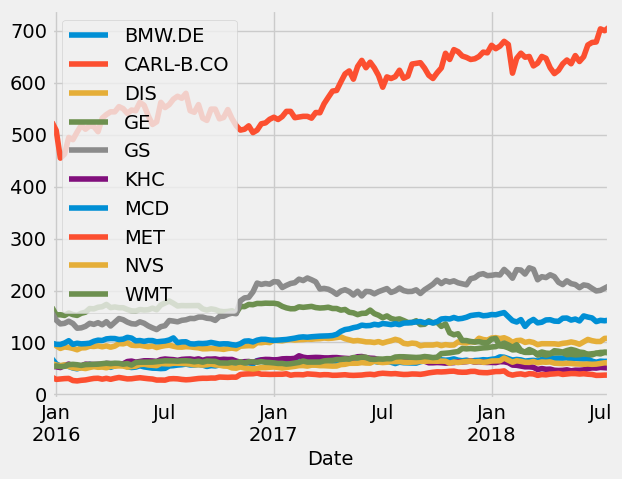

In [8]:
#plot
#plt.rcParams["figure.figsize"] = [18, 8]

df_aux.plot()
plt.show()

In [9]:
#create dataset with training period only
df_cor = df_aux[df_aux.index <= treatment_start]
display(df_cor.head())
display(df_cor.tail())

,BMW.DE,CARL-B.CO,DIS,GE,GS,KHC,MCD,MET,NVS,WMT
Date,,,,,,,,,,
2015-12-28,68.664032,523.957825,99.137016,167.678955,157.248505,54.473343,98.694115,33.303364,59.577045,52.994843
2016-01-04,58.684071,508.132263,93.636734,153.144974,143.035660,53.290436,96.471992,29.034233,56.474937,54.931355
2016-01-11,54.872150,454.667084,88.589310,153.360291,135.767822,51.808086,96.221321,29.759567,55.554001,53.539490
2016-01-18,56.060734,462.366089,91.419640,152.014526,136.858414,55.693684,98.911324,30.526363,56.945793,54.196518
2016-01-25,53.915646,494.445160,90.400726,156.643860,140.959152,58.441299,103.405777,30.844122,53.989105,57.369293


,BMW.DE,CARL-B.CO,DIS,GE,GS,KHC,MCD,MET,NVS,WMT
Date,,,,,,,,,,
2018-02-12,67.324387,646.679382,103.600952,86.364380,240.111603,56.098179,139.382294,38.912651,64.800575,95.624084
2018-02-19,66.506897,656.560425,104.301155,83.150826,239.348984,54.687801,144.037506,39.605141,63.622520,84.773071
2018-02-26,64.153763,648.796692,100.158279,81.698158,231.588089,53.221951,130.972900,37.961536,61.922539,81.013092
2018-03-05,65.039993,650.208313,101.850441,86.442665,243.619736,53.269505,139.775192,39.913834,61.706318,80.967438
2018-03-12,65.597725,632.034241,100.041588,82.797485,240.767563,52.272106,144.326447,39.479992,63.424454,81.863304


In [10]:
#correlation matrix

df_cor.corr()

,BMW.DE,CARL-B.CO,DIS,GE,GS,KHC,MCD,MET,NVS,WMT
BMW.DE,1.000000,0.677493,0.702099,-0.560315,0.900606,0.086082,0.733535,0.882010,0.541650,0.674949
CARL-B.CO,0.677493,1.000000,0.509493,-0.762227,0.661098,0.034456,0.931843,0.683643,0.867084,0.884714
DIS,0.702099,0.509493,1.000000,-0.318794,0.772599,0.336429,0.553775,0.660457,0.332149,0.471780
GE,-0.560315,-0.762227,-0.318794,1.000000,-0.603357,0.447606,-0.822315,-0.567904,-0.707410,-0.895724
GS,0.900606,0.661098,0.772599,-0.603357,1.000000,0.137826,0.751790,0.926493,0.492893,0.696490
KHC,0.086082,0.034456,0.336429,0.447606,0.137826,1.000000,-0.083728,0.139001,-0.035958,-0.128722
MCD,0.733535,0.931843,0.553775,-0.822315,0.751790,-0.083728,1.000000,0.797277,0.836783,0.896303
MET,0.882010,0.683643,0.660457,-0.567904,0.926493,0.139001,0.797277,1.000000,0.525432,0.690664
NVS,0.541650,0.867084,0.332149,-0.707410,0.492893,-0.035958,0.836783,0.525432,1.000000,0.790411
WMT,0.674949,0.884714,0.471780,-0.895724,0.696490,-0.128722,0.896303,0.690664,0.790411,1.000000


In [11]:
#create dataset with most correlated 

df_final = df_aux[['MET', 'CARL-B.CO', 'GS', 'MCD', 'NVS', 'WMT']]
df_final.head()

,MET,CARL-B.CO,GS,MCD,NVS,WMT
Date,,,,,,
2015-12-28,33.303364,523.957825,157.248505,98.694115,59.577045,52.994843
2016-01-04,29.034233,508.132263,143.035660,96.471992,56.474937,54.931355
2016-01-11,29.759567,454.667084,135.767822,96.221321,55.554001,53.539490
2016-01-18,30.526363,462.366089,136.858414,98.911324,56.945793,54.196518
2016-01-25,30.844122,494.445160,140.959152,103.405777,53.989105,57.369293


In [12]:
#pre and post period

pre_period = [start, training_end]
post_period = [treatment_start, end]

In [13]:
impact = CausalImpact(data= df_final,
                      pre_period=pre_period,
                      post_period=post_period,
                      nseason = [{'period':52}],
                      prior_level_sd = None)

### Results

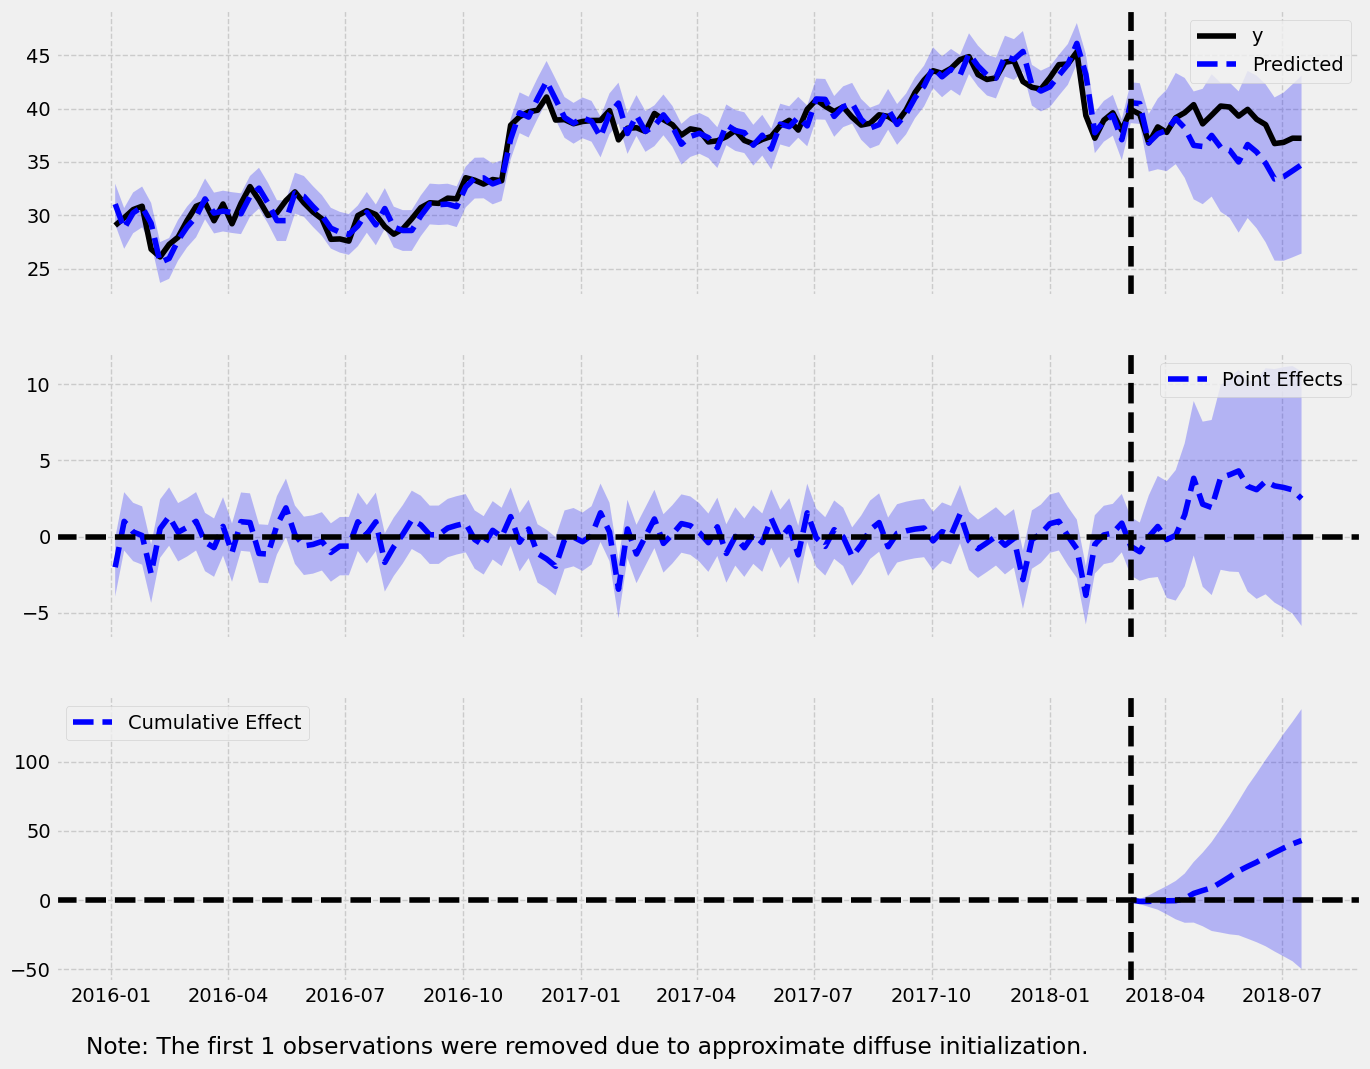

In [15]:
# plot
#plt.rcParams["figure.figsize"] = [8, 6]
impact.plot()
plt.show()

In [17]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    38.66              734.54
Prediction (s.d.)         36.39 (2.53)       691.42 (48.02)
95% CI                    [31.38, 41.29]     [596.28, 784.5]

Absolute effect (s.d.)    2.27 (2.53)        43.12 (48.02)
95% CI                    [-2.63, 7.28]      [-49.96, 138.26]

Relative effect (s.d.)    6.24% (6.94%)      6.24% (6.94%)
95% CI                    [-7.23%, 20.0%]    [-7.23%, 20.0%]

Posterior tail-area probability p: 0.17
Posterior prob. of a causal effect: 83.22%

For more details run the command: print(impact.summary('report'))


In [18]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 38.66. In the absence of an
intervention, we would have expected an average response of 36.39.
The 95% interval of this counterfactual prediction is [31.38, 41.29].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 2.27 with a 95% interval of
[-2.63, 7.28]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 734.54.
Had the intervention not taken place, we would have expected
a sum of 691.42. The 95% interval of this prediction is [596.28, 784.5].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an increase of +6.2